## Susceptible-Infected-Recovered (SIR-) models

SIR models are the simplest models of the spread of a pathogen (for example SARS-CoV-2) in a population. They model how individuals that are initially susceptible, become infected and infect more, before recovering. 

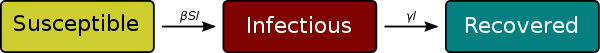


This SIR model is described by the following set of differential equations describing the fraction of the population that are susceptible $S$, infectious $I$ or recovered ($R$):

$$
\begin{split}
\frac{dS(t)}{dt} &= -\beta S(t)I(t) \\
\frac{dI(t)}{dt} &= \beta S(t)I(t) - \nu I(t)
\end{split}
$$

We don't actually need an additional equation for $R$ since $R = 1-S-I$. The quantity $\beta$ is the rate at which an people are infected in encouters between susceptible and infectious people, which is proportional to $S(t)I(t)$, while $\nu$ is the rate at which infectious people recover. 

You will have heard a lot about the quantity $R_0$ which describes how many people an infectious person infects on average. This quantity can be expressed in terms of $\beta$ and $\nu$ as

$$
R_0 = \frac{\beta}{\nu}
$$

Note that this is _system_ of differential equations. There are two quantities for which the equations describe the rate at which they change. And these two equations are coupled, that is they depend on each other in a non-linear way (the term $\beta S(t)I(t)$. Such systems can rarely be solved analytically. But we can tackle them by two approaches:

 * approximate specific limits, for example the limit $S \approx 1$ and $I\ll 1$.
 * solve them numerically

### Approximate solution in the early epidemic
Assume a population that is entirely susceptible to a disease $S(t)=1-1/N$ and a single individual is infected $I(0) = 1/N$. If $N$ is very big, the outbreak will initially not make much of a difference for $S(t)$ which stays close to $1$. If we hence ignore the first equation and assume $S\approx 1$ for the second, we get

$$
\frac{dI(t)}{dt} \approx (\beta - \nu) I(t) = \nu (R_0 - 1) I(t)
$$

We have seen this equation before: it is simply exponential growth with a growth rate $\beta - \nu$. If $\beta > \nu$, the outbreak grows ($R_0>1$), while the outbreak shrinks for $\beta <\nu$ ($R_0<1$).

The initial solution of this equation is 
$$
I(t) \approx I(0) e^{\nu(R_0-1)t}
$$


However, this approximate solution will not describe the behavior once the outbreak is large. To understand this, we need to solve it numerically. 

In [2]:
def derivative(y, t, beta, nu):
    S, I = y   # y is a vector with values [S, I]
    dSdt = -beta*S*I
    dIdt = beta*S*I - nu*I
    return [dSdt, dIdt]

In [3]:
import numpy as np
from scipy.integrate import odeint

I0 = 1e-6
S0 = 1 - I0
nu = 1/3 # recovery after 3 days
R_0 = 2  # average number of infections per individual
beta = R_0*nu # one infection per day per contact
T = np.linspace(0,100,101)
sol = odeint(derivative, [S0, I0], T, (beta, nu))


Final susceptible population: 0.20
1.594=1.594


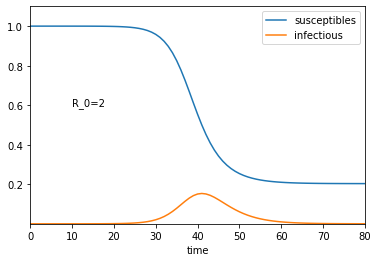

In [18]:
import matplotlib.pyplot as plt

plt.plot(T, sol[:,0], label='susceptibles')
plt.plot(T, sol[:,1], label='infectious')
plt.text(10,0.6, f"R_0={R_0}")
#plt.plot(T, I0*np.exp((beta-nu)*T), ls='--', label='initial approximation')
plt.xlim([0,80])
plt.ylim([0,1.1])
plt.ylim([I0,1.1])
plt.xlabel('time')
#plt.yscale('log')
plt.legend()
# see how many people remain 6susceptible after the outbreak. This is the last element of 'sol' 'sol[-1]'
print(f"Final susceptible population: {sol[-1,0]:1.2f}")
print(f"{-np.log(sol[-1,0]):1.3f}={R_0*(1-sol[-1,0]):1.3f}")
plt.savefig('SIR_overshoot.png')

There are two important messages here:
 * solving a system of non-linear ODEs works just the same as a one-dimensional one
 * Approximate solutions in some parts of the range can be very accurate

#### Dig deeper
 * change the parameters of the model ($R_0$) and observe how the fraction of individuals that remain susceptible at the end of the outbreak changes. 
 * automate the process of changing $R_0$ and plot the remaining number of susceptible against $R_0$.
 * explore the behavior of the outbreak as you change the initial value $S_0$ of $S$. What happens when $S_0 < 1/R_0$? How does this "herd immunity" threshold compare to the remaining number of susceptible individuals after the outbreak?
 * include a an additional state of "exposed" individuals that describes individuals during their incubation time. These models are called [Susceptible-Exposed-Infectious-Recovered-models (SEIR models)](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)